In [1]:
import numpy as np
from PIL import Image
import os

In [2]:
def standardization(matrix):
    # STANDARDIZATION
    mean_row_vector = np.mean(matrix, axis=0)
    std_row_vector = np.std(matrix, axis=0)
    rows = len(matrix)
    factor = np.sqrt((1 - 1 / rows))
    std_row_vector = std_row_vector / factor

    z_matrix = np.array(matrix, dtype=np.float64)
    # z_matrix = (matrix - mean_row_vector) / std_row_vector
    np.divide((matrix - mean_row_vector), std_row_vector, out=z_matrix, where=std_row_vector!=0)

    return z_matrix

def perform_pca(matrix, no_of_pc):
    z_matrix = standardization(matrix)
    # COVARIANCE MATRIX
    cov_matrix = np.cov(z_matrix, rowvar=False)
    # EIGEN VALUES & VECTORS
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    # print(eig_vec)
    # print(eig_val)
    sort = np.argsort(eig_val)
    selected_eig_vec = (np.transpose(eig_vec)[~sort])[:no_of_pc]
    # print(selected_eig_vec)
    transformed_matrix = np.dot(z_matrix, np.transpose(selected_eig_vec))

    return transformed_matrix, np.transpose(selected_eig_vec), eig_val


def loadImages(folderName, n):
    count = 0
    images = []
    labels = []
    for img in os.listdir(folderName):
        count += 1
        images.append(list(np.asarray(Image.open(os.path.join(folderName, img))).flatten()))
        labels.append(n)
    return images, labels

In [3]:
train_images = []
train_labels = []
test_images = []
test_labels = []
for i in range(10):
    a, b = list(loadImages(f'./q1_data/trainingSet/trainingSet/{i}', i))
    train_images += a[:4*(len(a)//5)]
    train_labels += b[:4*(len(a)//5)]
    test_images += a[4*(len(a)//5):]
    test_labels += b[4*(len(a)//5):]

In [4]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [5]:
print(train_images.shape)
print(test_images.shape)

(33584, 784)
(8416, 784)


In [6]:
# KNN implementation
def KNN(test_transformed_matrix, train_labels, final_matrix, k):
    predicted_values = []
    for sample in test_transformed_matrix:
        distance_matrix = np.sum((final_matrix - sample)**2, axis=1)
        selected_indices = np.argsort(distance_matrix)[:k]
        # print(selected_indices)
        selected_labels = []
        for i in selected_indices:
            selected_labels.append(train_labels[i])
        # selected_labels = train_labels[selected_indices]

        frequency_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
        for i in selected_labels:
            frequency_dict[i] += 1

        key, value = -1, 0
        for i in frequency_dict.keys():
            if frequency_dict[i] > value:
                key = i
                value = frequency_dict[i]
        predicted_values.append(key)
    return predicted_values
# for i in range(10):
#     print(predicted_values.count(i))

In [8]:
# FOR PC = 5
final_matrix, selected_eigen_vec, eigen_vals = perform_pca(train_images, 5)
final_matrix

array([[-0.39362769, -0.12275081,  0.32796441,  0.46774096, -0.99605887],
       [ 0.58312579, -0.14219577,  0.27835719, -0.39296914, -0.19465652],
       [ 1.06332779, -0.26288397,  0.01184377, -0.39755113, -0.23158193],
       ...,
       [-0.07042714, -0.3956071 ,  0.39317869, -0.04463568,  0.110609  ],
       [ 0.26974275, -0.19932522,  0.1805552 ,  0.56195382,  0.38689803],
       [-0.31362453, -0.15203393, -0.38105086, -0.5224161 ,  0.26857719]])

In [ ]:
# FOR PC = 25
final_matrix, selected_eigen_vec, eigen_vals = perform_pca(train_images, 25)
final_matrix

In [ ]:
# FOR PC = 125
final_matrix, selected_eigen_vec, eigen_vals = perform_pca(train_images, 125)
final_matrix

In [55]:
# Testing Matrix for PCA
test_z_matrix = standardization(test_images)
test_transformed_matrix = np.dot(test_z_matrix, selected_eigen_vec)
test_transformed_matrix

array([[-1.41002641,  0.45950356, -0.75105664,  0.49515239,  0.64848102],
       [-1.38845404,  0.49728804, -0.07061148,  0.60170227,  0.95842629],
       [-0.78542043, -0.09483206,  0.13358177,  1.17108413,  0.49496935],
       ...,
       [-0.24782463,  0.24342749,  0.13963689, -0.73741786,  0.47687506],
       [-0.23264722, -0.08502687,  0.38258059, -0.33365764, -0.11003412],
       [-0.59484517, -0.27143183, -0.71999161,  0.04999003, -0.02339747]])

In [64]:
# Without PCA
final_matrix = test_images
test_transformed_matrix = train_images

In [65]:
predicted_values = KNN(test_transformed_matrix, train_labels, final_matrix, 3)

In [66]:
correct_prediction = 0
for i in range(len(test_labels)):
    if predicted_values[i] == test_labels[i]:
        correct_prediction += 1
print(f"Prediction Accuracy is : {100*correct_prediction/len(test_labels)} %")

Prediction Accuracy is : 9.850285171102662 %


X = 186, variance is 80%


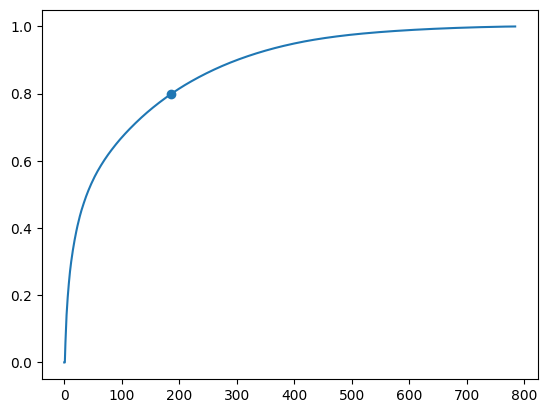

In [9]:
import matplotlib.pyplot as plt
x = [i for i in range(test_images.shape[1]+1)]
y = [0]
eigen_vals.sort()
eigen_vals = eigen_vals[::-1]
s = sum(eigen_vals)
for i in range(test_images.shape[1]):
    y.append(sum(eigen_vals[:i])/s)

mark = [0,0]
for j,i in enumerate(y):
    if i-0.8 <= 0.000000000001:
        mark[0] = x[j]
        mark[1] = y[j]

print(f"X = {mark[0]}, variance is 80%")
plt.plot(x, y)
plt.scatter(mark[0], mark[1])
plt.show()

In [46]:
a,b,c = perform_pca([[1,5,3,1],[4,2,6,3],[1,4,3,2],[4,4,1,1],[5,5,2,3]], 2)
print(a)
print(b)
print(c/1.25)

[[ 0.9398916  -1.31476269]
 [ 0.43742331  2.50110671]
 [ 0.83495341 -0.31558805]
 [-0.58816273 -0.973998  ]
 [-1.62410559  0.10324203]]
[[-0.7810274   0.29520559]
 [-0.26768116 -0.56103699]
 [ 0.4622677   0.55255128]
 [-0.32349894  0.54108986]]
[1.80861251 0.95110738 0.06798253 0.37229758]
